# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

> Again, **don't use ChatGPT for this assignment.** You should be able to memorize the most basic parts of pandas.

## 0) Setup

Import pandas **with the correct name** .

In [ ]:
# Installations
# To read EXCEL
# !pip install --quiet pandas openpyxl
# to plot
# !pip install --quiet matplotlib

In [295]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the name we'll always use for a dataframe.

> **TIP:** You will use `read_excel` instead of `read_csv`. Trying `read_excel` the first time will probably not work, you'll get an error message. Be sure to read the error carefully: *you probably need to install a new library before it will work, and the error tells you what the library is named*. You *might* need to do `Kernel > Restart Kernel...` and run the notebook again from the top in order to get it to work.

In [297]:
# Read the Excel file
df = pd.read_excel("richpeople.xlsx")
df.head()

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
0,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,...,former chairman and CEO,1955.0,NaN,"television, Univision",represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
1,2014,Abdulla Al Futtaim,687,United Arab Emirates,ARE,2.5,inherited,inherited,male,NaN,...,relation,1930.0,NaN,"auto dealers, investments",company split between him and cousin in 2000,NaN,http://en.wikipedia.org/wiki/Al-Futtaim_Group,http://www.al-futtaim.ae/content/groupProfile.asp,NaN,NaN
2,2014,Abdulla bin Ahmad Al Ghurair,305,United Arab Emirates,ARE,4.8,inherited,inherited,male,NaN,...,relation,1960.0,NaN,diversified,inherited from father,NaN,http://en.wikipedia.org/wiki/Al-Ghurair_Group,http://www.alghurair.com/about-us/our-history,NaN,NaN
3,2014,Abdullah Al Rajhi,731,Saudi Arabia,SAU,2.4,self-made,self-made finance,male,NaN,...,founder,1957.0,NaN,banking,NaN,NaN,http://en.wikipedia.org/wiki/Al-Rajhi_Bank,http://www.alrajhibank.com.sa/ar/investor-rela...,http://www.alrajhibank.com.sa/ar/about-us/page...,NaN
4,2014,Abdulsamad Rabiu,1372,Nigeria,NGA,1.2,self-made,founder non-finance,male,54.0,...,founder,1988.0,NaN,"sugar, flour, cement",NaN,NaN,http://www.forbes.com/profile/abdulsamad-rabiu/,http://www.bloomberg.com/research/stocks/priva...,NaN,NaN


## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [298]:
# Column name, rows and columns and name of each column
# df.shape()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1653 non-null   int64  
 1   name                     1653 non-null   object 
 2   rank                     1653 non-null   int64  
 3   citizenship              1653 non-null   object 
 4   countrycode              1653 non-null   object 
 5   networthusbillion        1653 non-null   float64
 6   selfmade                 1651 non-null   object 
 7   typeofwealth             1651 non-null   object 
 8   gender                   1653 non-null   object 
 9   age                      1590 non-null   float64
 10  industry                 1652 non-null   object 
 11  IndustryAggregates       1652 non-null   object 
 12  region                   1653 non-null   object 
 13  north                    1653 non-null   int64  
 14  politicalconnection     

## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [299]:
sorted_df = df.sort_values(by="networthusbillion", ascending = False).head(10)
top10 = sorted_df.head(10)
print("The top 10 richest billionaires are:\n", top10["name"])

The top 10 richest billionaires are:
 184           Bill Gates
226     Carlos Slim Helu
79        Amancio Ortega
1562      Warren Buffett
862        Larry Ellison
339           David Koch
247         Charles Koch
1364     Sheldon Adelson
280       Christy Walton
724           Jim Walton
Name: name, dtype: object


## 4a) How many male billionaires are there compared to the number of female billionares?

> **TIP:** This is not a `.groupby`

In [300]:
bn_bygender = df["gender"].value_counts()
print(f"There are {bn_bygender['male']} male billionaires and {bn_bygender['female']} female billionaires")

There are 1473 male billionaires and 180 female billionaires


## 4b) What percent is that?

> **TIP:** Doing percentages with the answer to `4a` is so common that there's an extra parameter to automatically calculate it. Look at the documentation!

In [303]:
bn_gender_perc = df["gender"].value_counts(normalize = True) * 100
bn_gender_perc
print(f"{round(bn_gender_perc['male'],0)}% billionaires are male and {round(bn_gender_perc['female'],0)} billionaires are female.")

89.0% billionaires are male and 11.0 billionaires are female.


## 4c) Is the average wealth different for a female billionaire as compared to a male billionaire?

> **TIP:** This one *does* use `.groupby`. You can pick what 'average' means in this context.

In [304]:
avg_wealth = df.groupby("gender")["networthusbillion"].mean()

if avg_wealth["female"] != avg_wealth["male"]:
    print("Yes, average wealth is different for a female billionaire compared to a male billionaire.")

Yes, average wealth is different for a female billionaire compared to a male billionaire.


## 5a) What is the most common source/type of wealth?

In [305]:
srcwealth = df["sourceofwealth"].value_counts()[[0]]
print("The most common source of wealth is", srcwealth.index[0] + ".")

The most common source of wealth is real estate.


/var/folders/hj/m75dn_gn3cg_4jbp96lgh45r0000gn/T/ipykernel_31375/1331286011.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  srcwealth = df["sourceofwealth"].value_counts()[[0]]


## 5b) Is the most common source/type of wealth different between men and women?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together??? You could also do this as two separate cells where you calculate it separately for men and women.
>
> **TIP:** Use percentages for this, it makes it a lot more readable.

In [310]:
wealth_by_gender = df.groupby("gender")["sourceofwealth"].value_counts(normalize = True)*100
wealth_by_gender

srcmen = wealth_by_gender.loc["male"].idxmax() 
srcwomen = wealth_by_gender.loc["female"].idxmax() 

if srcmen != srcwomen:
    print("The most common source of wealth for women is", srcwomen, "and for men is", srcmen)
else:
    print("Most common source of wealth for both genders is the same")

The most common source of wealth for women is diversified and for men is real estate


## 6a) What companies have the most billionaires? Let's see the top five.

> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like you should use `groupby`, but don't! There's an easier way to count.

In [311]:
top_co = df["company"].value_counts().head(5)
print("Top 5 companies with most billionaires are:")
top_co

Top 5 companies with most billionaires are:


company
Hyatt                  11
Oetker-Gruppe           8
S. C. Johnson & Son     7
Alfa Group              6
Votorantim Group        6
Name: count, dtype: int64

### 6b) Graph those top 5 as a horizontal bar graph. Make the largest bar be at the top of the graph.

> **TIP:** Just try to throw `.plot()` on the end??
> 
> **TIP:** Make the largest bar be at the top of the graph
>
> **TIP:** If your chart seems... weird, think about where in the process you're sorting vs using `head`

<Axes: title={'center': 'Top 5 Companies with most billionaires'}, xlabel='No. of billionaires', ylabel='Company'>

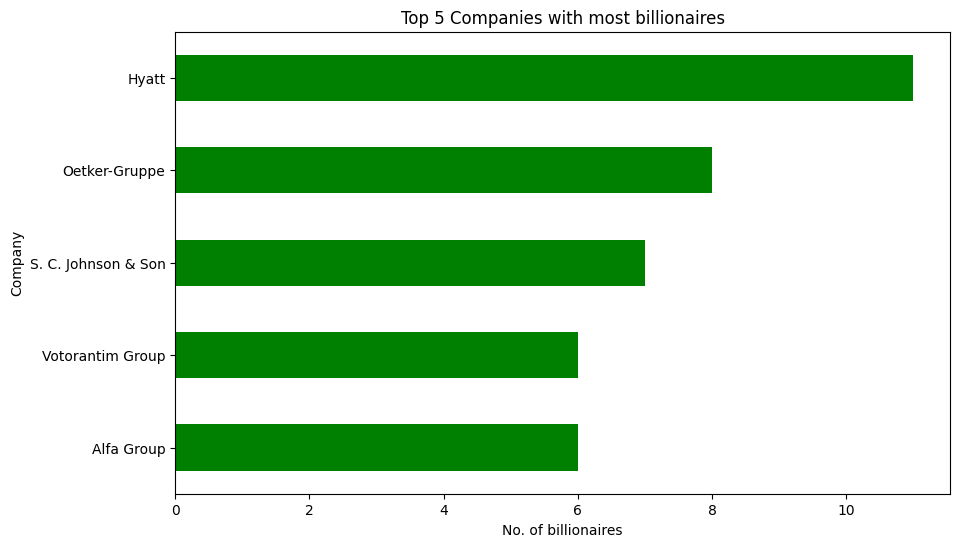

In [312]:
asc_topco = top_co.sort_values(ascending = True)
asc_topco.plot(kind='barh', 
               color='green', 
               figsize=(10, 6), 
               title = "Top 5 Companies with most billionaires",
               xlabel = "No. of billionaires",
               ylabel = "Company")

## 7) How much money do these top 5 billionaires have in total?

> **TIP:** for multiple conditions, you can't use `or` and `and`. In pandas, `|` means *or* and `&` means *and*.
>
> **TIP:** Checking multiple conditions can be done two ways.
> - `(df.colname == 'A') | (df.colname == 'B')`
> - `df.colname.isin(['A', 'B'])`

In [317]:
# top5 = sorted_df.head(5)
# top5_wealth = top5["networthusbillion"].sum()
# print("The top 5 billionaires are worth", top5_wealth, "billion.")

topcolist = top_co.index.tolist()
# billionaires of the 5 companies
topcos = df[df["company"].isin(topcolist)]
print("The total amount of money billionaires in top 5 companies have is $", round(topcos["networthusbillion"].sum(),0), "billion.")

The total amount of money billionaires in top 5 companies have is $ 120.0 billion.


## 8) What are the top 10 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is **total amount of money per country.**

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," "I want to add it all up," and "I want 10 of them." Just chain it all together.

In [320]:
df.head()
wealth_bycountry = df.groupby("countrycode")["networthusbillion"].sum().sort_values(ascending = False)
print("Top 10 countries with most money held by billionaires:")
wealth_bycountry.head(10)

Top 10 countries with most money held by billionaires:


countrycode
USA    2322.4
RUS     422.5
DEU     401.4
CHN     375.8
FRA     235.3
HKG     213.7
BRA     192.2
IND     191.9
ITA     158.1
GBR     152.0
Name: networthusbillion, dtype: float64

## 9a) How old is an average billionaire?

In [321]:
print("The age of an average billionaire is:", round(int(df["age"].median()),0), "years.")

The age of an average billionaire is: 63 years.


## 9b) How old are self-made billionaires compared to non self-made billionaires? 

In [322]:
byselfmade = df.groupby("selfmade")["age"].median().reset_index()
byselfmade
# print(byselfmade[["inherited"]][[0]])

,selfmade,age
0,inherited,65.0
1,self-made,62.0


## 10a) Who are the three youngest billionaires? Who are the three oldest?

In [323]:
agerank = df.sort_values(by="age", ascending = False)
# df["age"].sort_values(ascending = False)

# DROP NAs from the age
agerank_clean = agerank[agerank['age'].notna()]
agerank_clean

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
343,2014,"David Rockefeller, Sr.",580,United States,USA,2.9,inherited,inherited,male,98.0,...,relation,1870.0,NaN,"oil, banking",family made most of fortune in the late 19th a...,NaN,http://en.wikipedia.org/wiki/David_Rockefeller,http://en.wikipedia.org/wiki/Standard_Oil,http://en.wikipedia.org/wiki/Rockefeller_family,NaN
816,2014,Karl Wlaschek,305,Austria,AUT,4.8,self-made,founder non-finance,male,96.0,...,founder,1953.0,NaN,retail,NaN,NaN,http://en.wikipedia.org/wiki/BILLA,http://en.wikipedia.org/wiki/Karl_Wlaschek,https://www.billa.at/Footer_Nav_Seiten/Geschic...,NaN
836,2014,Kirk Kerkorian,328,United States,USA,4.5,self-made,self-made finance,male,96.0,...,investor,1924.0,NaN,"casinos, investments",purchased in 1969,NaN,http://en.wikipedia.org/wiki/Kirk_Kerkorian,http://www.forbes.com/profile/kirk-kerkorian/,PROFILE: Las Vegas billionaire amassed his wea...,NaN
588,2014,Henry Hillman,687,United States,USA,2.5,inherited,inherited,male,95.0,...,relation,1942.0,NaN,investments,inherited from father,NaN,http://www.forbes.com/profile/henry-hillman/,http://en.wikipedia.org/wiki/Calgon_Carbon,NaN,NaN
435,2014,Erika Pohl-Stroher,1154,Germany,DEU,1.5,inherited,inherited,female,95.0,...,relation,1880.0,NaN,hair products,3rd generation,23% stake in the company,http://www.forbes.com/profile/erika-pohl-stroher/,http://en.wikipedia.org/wiki/Wella,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,2014,Drew Houston,1372,United States,USA,1.2,self-made,founder non-finance,male,30.0,...,founder,2007.0,NaN,Dropbox,NaN,NaN,http://en.wikipedia.org/wiki/Drew_Houston,http://en.wikipedia.org/wiki/Dropbox_(service),http://www.forbes.com/profile/drew-houston/,NaN
1004,2014,Mark Zuckerberg,21,United States,USA,28.5,self-made,founder non-finance,male,29.0,...,founder,2004.0,NaN,Facebook,NaN,NaN,http://www.forbes.com/profile/mark-zuckerberg/,NaN,NaN,NaN
127,2014,"Anton Kathrein, Jr.",1270,Germany,DEU,1.4,inherited,inherited,male,29.0,...,relation,1919.0,NaN,antennas,3rd generation,NaN,http://www.forbes.com/profile/anton-kathrein-jr/#,NaN,NaN,NaN
397,2014,Dustin Moskovitz,202,United States,USA,6.8,self-made,founder non-finance,male,29.0,...,founder,2004.0,NaN,Facebook,NaN,NaN,http://en.wikipedia.org/wiki/Dustin_Moskovitz,http://www.forbes.com/profile/dustin-moskovitz/,https://www.facebook.com/facebook/info?tab=pag...,NaN


In [292]:
# OLDEST
old = agerank_clean.head(3)["name"].reset_index()
print("The oldest billionaires are:")
old["name"]

The oldest billionaires are:


0    David Rockefeller, Sr.
1             Karl Wlaschek
2            Kirk Kerkorian
Name: name, dtype: object

In [324]:
# YOUNGEST
young = agerank_clean.tail(4)["name"].reset_index()
print("The youngest billionaires are:")
young["name"]
# statement = 'The youngest billionaires are'

# for name in young["name"]:
#     statement = statement + name

The youngest billionaires are:


0        Mark Zuckerberg
1    Anton Kathrein, Jr.
2       Dustin Moskovitz
3            Perenna Kei
Name: name, dtype: object

## 10b) Make a graph of the distribution of ages.

> **TIP:** You use `.plot()` to graph values in a column independently, but `.hist()` to draw a [histogram](https://www.mathsisfun.com/data/histograms.html) of the distribution of their values

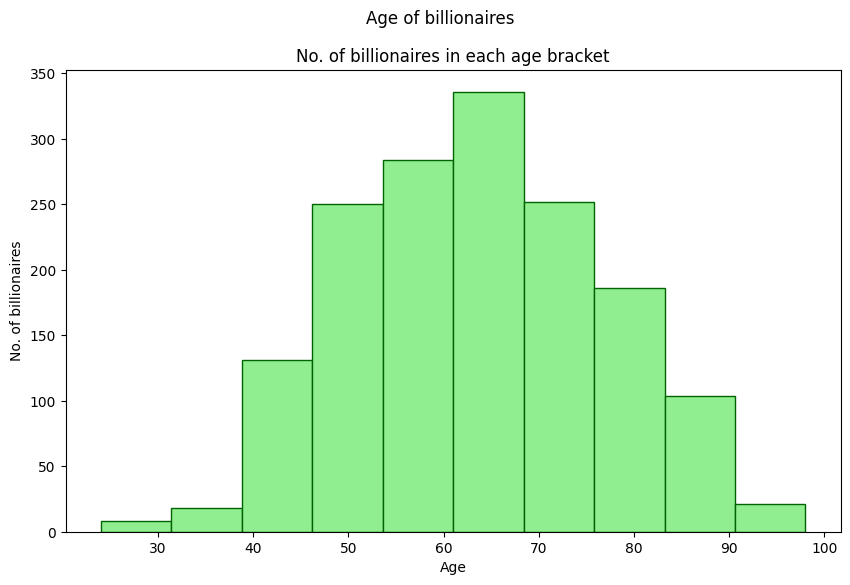

In [325]:
df["age"].hist(bins = 10, color = "lightgreen", edgecolor = "darkgreen", figsize=(10, 6))
plt.suptitle("Age of billionaires")
plt.title("No. of billionaires in each age bracket")
plt.ylabel('No. of billionaires')
plt.xlabel("Age")
plt.grid(False)

## 11) Make a scatterplot of net worth compared to age

It's more fun to do this in Altair as compared to matplotlib, but either is fine.

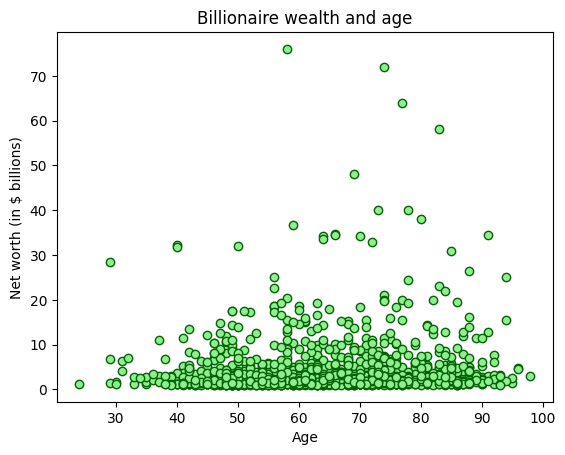

In [326]:
# Create a scatter plot using Matplotlib
# plt.figure(figsize=(10, 6))
plt.scatter(df["age"], df["networthusbillion"], color = "lightgreen", edgecolor = "darkgreen")

# Customize the plot
plt.title("Billionaire wealth and age")
plt.xlabel("Age")
plt.ylabel("Net worth (in $ billions)")
plt.grid(False)

## 13) Make a bar graph of the wealth of the top 10 richest billionaires

> **TIP:** When you make your plot, you'll need to set the `x` and `y` or else your chart will look _crazy_
>
> **TIP:** x and y might be the opposite of what you expect them to be

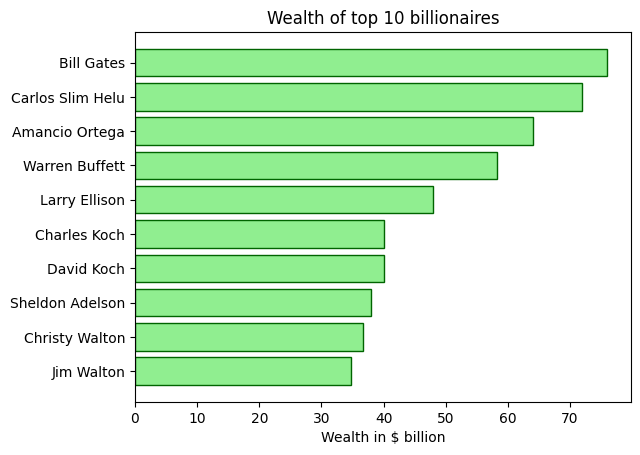

In [327]:
top10 = top10.sort_values("networthusbillion", ascending = True)

plt.barh(top10["name"], top10["networthusbillion"], color = "lightgreen", edgecolor = "darkgreen")
plt.title("Wealth of top 10 billionaires")
plt.xlabel("Wealth in $ billion")
plt.grid(False)


## 14) Read in the most recent data

I copied and pasted the most recent data from [the original Bloomberg story](https://www.bloomberg.com/billionaires/) (it's in the page's source code), but it all was saved as JSON. Can you use pandas to read in `billionaires.json`?

> **TIP:** If `pd.read_csv` reads a CSV and `pd.read_excel` reads an excel file... what reads in JSON?
>
> **TIP:** It's a lot less complicated than what we did in class.

In [328]:
json_df = pd.read_json("billionaires.json")
json_df.head()

,commonName,commonLastName,citizenship,slug,industry,personId,rank,worth,lastChange,lastPercentChange,ytdChange,ytdPercentChange,sector,fWorth,fLastChange,fYtdChange,fLastPercentChange,fYtdPercentChange
0,Elon Musk,Musk,United States,elon-r-musk,Technology,1954518,1,221116780866,9795811154,4.64,84106712938,61.39,Technology,$221B,+$9.80B,+$84.1B,+4.6%,+61.4%
1,Bernard Arnault,Arnault,France,bernard-j-arnault,Consumer,1392853,2,170267873036,7356040557,4.52,8178459368,5.05,Consumer,$170B,+$7.36B,+$8.18B,+4.5%,+5.0%
2,Jeff Bezos,Bezos,United States,jeffrey-p-bezos,Technology,1642252,3,169556171871,3202661603,1.93,62599942079,58.53,Technology,$170B,+$3.20B,+$62.6B,+1.9%,+58.5%
3,Bill Gates,Gates,United States,william-h-gates,Technology,1390479,4,131137012631,1103482475,0.85,21900118029,20.05,Technology,$131B,+$1.10B,+$21.9B,+0.8%,+20.1%
4,Larry Ellison,Ellison,United States,lawrence-j-ellison,Technology,1491757,5,129608081535,2286642464,1.80,37780140594,41.14,Technology,$130B,+$2.29B,+$37.8B,+1.8%,+41.1%


### ENDS! 🐈